# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

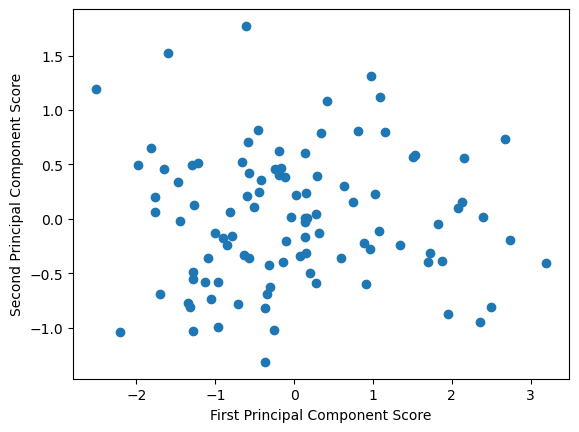

In [44]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

The first prinicpal component score is high and explains a significant amount of the vairance in the dataset, with the second explaining around 18/19% of the variance of the dataset, this means that the first and second prinicpal component would be appropriate for predicting the values within the dataset and the third not being as necessarry, the values in the top left represent values that did not have a large impact on the first prinicpal component, but on the second one had a much larger impact.  This further reinforces the point that the third score is not as necessary since the first two overlap quite well, with lower second prinicipal component scores having higher first prinicpal component scores.  The reason for this is that the scale(std) of the second prinicpal ocmponent is much smaller than the third when they are created, meaning the spread of the second series will more closely resemble the first series.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [45]:
car_claims_dataset = pd.read_csv("./car_claims_FE.csv")
car_claims_dataset.drop(columns=["FraudFound_No","FraudFound_Yes", "FraudFound_No.1","FraudFound_Yes.1", "Age.1"], inplace=True)

In [46]:
car_claims_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   VehicleCategory_Sedan    15420 non-null  bool   
 1   VehicleCategory_Sport    15420 non-null  bool   
 2   VehicleCategory_Utility  15420 non-null  bool   
 3   Make_Accura              15420 non-null  bool   
 4   Make_BMW                 15420 non-null  bool   
 5   Age                      15420 non-null  int64  
 6   Deductible               15420 non-null  int64  
 7   Make_Chevrolet           15420 non-null  bool   
 8   Make_Dodge               15420 non-null  bool   
 9   Make_Ferrari             15420 non-null  bool   
 10  Make_Ford                15420 non-null  bool   
 11  Make_Honda               15420 non-null  bool   
 12  Make_Jaguar              15420 non-null  bool   
 13  Make_Lexus               15420 non-null  bool   
 14  Make_Mazda            

In [47]:
car_claims_corr = car_claims_dataset.corr()

<Axes: >

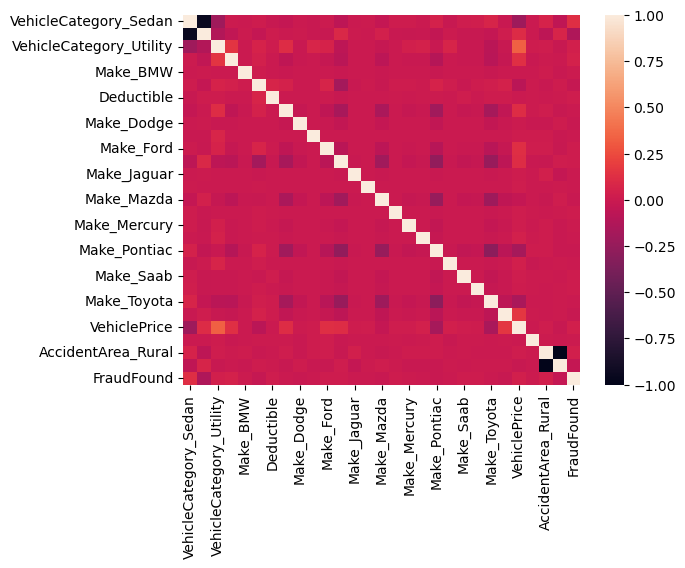

In [48]:
import seaborn as sns 
sns.heatmap(car_claims_corr)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_car_claims = scaler.fit_transform(car_claims_dataset)

In [50]:
pca_3 = decomposition.PCA(n_components = 3)
pca_3 = pca_3.fit(scaled_car_claims)
car_claims_pca3 = pca_3.transform(scaled_car_claims)
explained_variance_3 = pca_3.explained_variance_ratio_
print(explained_variance_3)

[0.0751983  0.06769617 0.05442946]


In [51]:
car_claims_dataset.columns

Index(['VehicleCategory_Sedan', 'VehicleCategory_Sport',
       'VehicleCategory_Utility', 'Make_Accura', 'Make_BMW', 'Age',
       'Deductible', 'Make_Chevrolet', 'Make_Dodge', 'Make_Ferrari',
       'Make_Ford', 'Make_Honda', 'Make_Jaguar', 'Make_Lexus', 'Make_Mazda',
       'Make_Mecedes', 'Make_Mercury', 'Make_Nisson', 'Make_Pontiac',
       'Make_Porche', 'Make_Saab', 'Make_Saturn', 'Make_Toyota', 'Make_VW',
       'VehiclePrice', 'DriverRating', 'AccidentArea_Rural',
       'AccidentArea_Urban', 'FraudFound'],
      dtype='object')

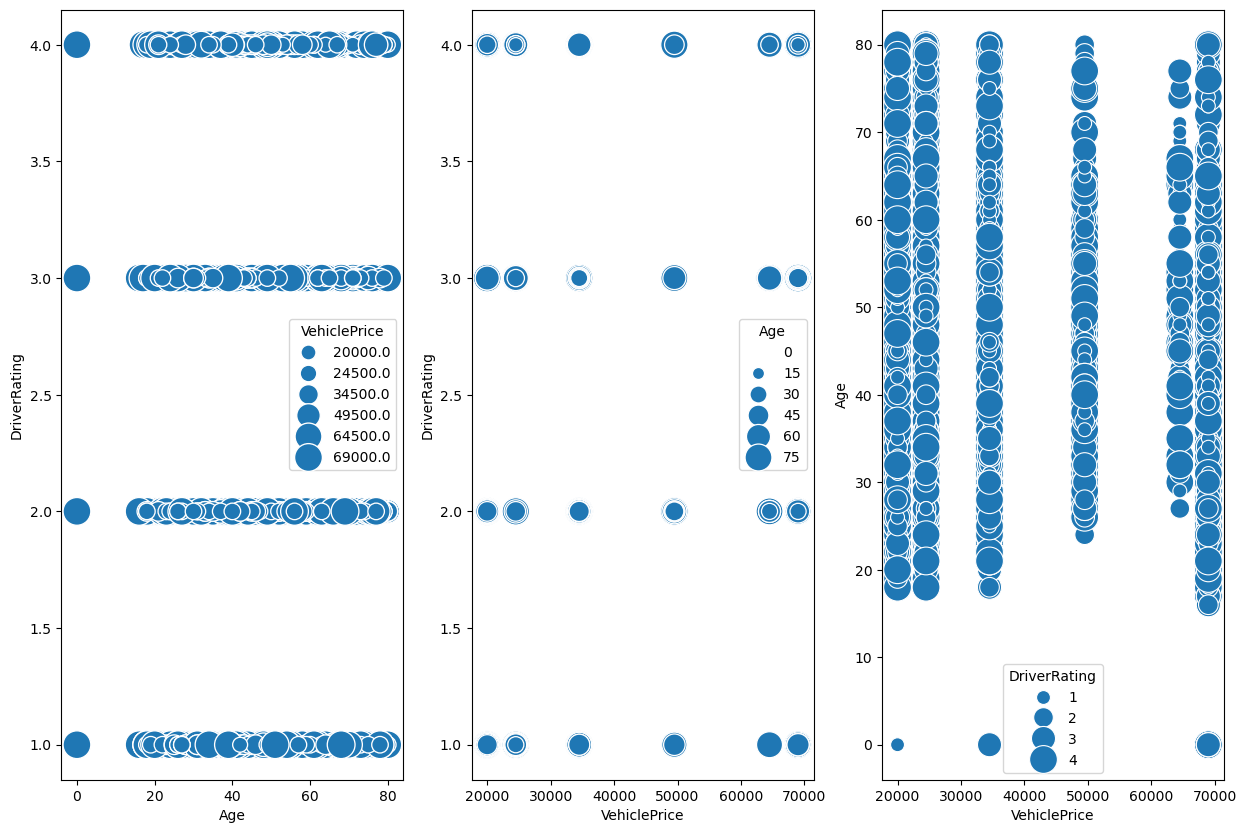

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.subplot(1,3,1)

df_only_data_wanted = car_claims_dataset[["VehiclePrice", "Age", "DriverRating"]]

vehicile_series = df_only_data_wanted["VehiclePrice"]
age_series = df_only_data_wanted["Age"]
driver_rating_series = df_only_data_wanted["DriverRating"]

vehicile_min = vehicile_series.min()
vehicile_max = vehicile_series.max()

age_min =age_series.min()
age_max = age_series.max()

driver_rating_min = driver_rating_series.min()
driver_rating_max = driver_rating_series.max()

maxbubble = 400
ax = sns.scatterplot(data = df_only_data_wanted, x = "Age", y = "DriverRating", size = "VehiclePrice", sizes = (vehicile_min / vehicile_max * maxbubble, maxbubble))
ax.set_xlabel("Age")
ax.set_ylabel("DriverRating")

plt.subplot(1,3,2)
maxbubble = 400
ax = sns.scatterplot(data = df_only_data_wanted, x = "VehiclePrice", y = "DriverRating", size = "Age", sizes = (age_min / age_max * maxbubble, maxbubble))
ax.set_xlabel("VehiclePrice")
ax.set_ylabel("DriverRating")



plt.subplot(1,3,3)
maxbubble = 400
ax = sns.scatterplot(data = df_only_data_wanted, x = "VehiclePrice", y = "Age", size = "DriverRating", sizes = (driver_rating_min / driver_rating_max * maxbubble, maxbubble))
ax.set_xlabel("VehiclePrice")
ax.set_ylabel("Age")

None


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_regression_car_claims = LinearRegression()
X_test = car_claims_dataset[["Age", "VehiclePrice"]]
Y_test = pd.DataFrame(car_claims_dataset["DriverRating"])
linear_regression_car_claims.fit(X_test,Y_test)
preds = linear_regression_car_claims.predict(X_test)
mse = mean_squared_error(preds,Y_test)
print(mse)

1.2530889701526635


Text(0, 0.5, 'Actual')

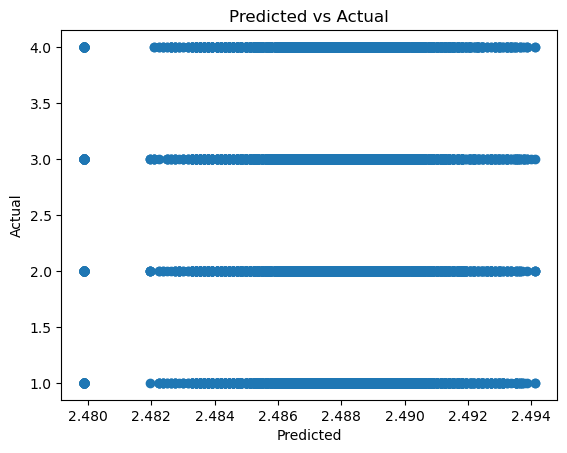

In [54]:
plt.scatter(preds,Y_test)
plt.title("Predicted vs Actual")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_pca = car_claims_dataset.drop(columns=["FraudFound"],inplace=False)
y_pca = car_claims_dataset["FraudFound"]
pipeline = Pipeline([('pca', decomposition.PCA(n_components=1)), ('rf', RandomForestClassifier(random_state=42))])
pipeline.fit(X_pca,y_pca)
y_preds_rf_pca = pipeline.predict(X_pca)
accuracy = accuracy_score(y_pca,y_preds_rf_pca)
print(f"Accuracy with 1 PCA {accuracy}")


Accuracy with 1 PCA 0.9404020752269779


In [56]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_pca = car_claims_dataset.drop(columns=["FraudFound"],inplace=False)
y_pca = car_claims_dataset["FraudFound"]
pipeline = Pipeline([('pca', decomposition.PCA(n_components=2)), ('rf', RandomForestClassifier(random_state=42))])
pipeline.fit(X_pca,y_pca)
y_preds_rf_pca = pipeline.predict(X_pca)
accuracy = accuracy_score(y_pca,y_preds_rf_pca)
print(f"Accuracy with 2 PCA {accuracy}")


Accuracy with 2 PCA 0.9630350194552529


In [57]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_pca = car_claims_dataset.drop(columns=["FraudFound"],inplace=False)
y_pca = car_claims_dataset["FraudFound"]
pipeline = Pipeline([('pca', decomposition.PCA(n_components=3)), ('rf', RandomForestClassifier(random_state=42))])
pipeline.fit(X_pca,y_pca)
y_preds_rf_pca = pipeline.predict(X_pca)
accuracy = accuracy_score(y_pca,y_preds_rf_pca)
print(f"Accuracy with 3 PCA {accuracy}")


Accuracy with 3 PCA 0.9632295719844358


In [58]:
X_no_pca = car_claims_dataset.drop(columns=["FraudFound"],inplace=False)
y_no_pca = car_claims_dataset["FraudFound"]
random_forrest = RandomForestClassifier(random_state=42)
random_forrest.fit(X_no_pca,y_no_pca)
y_preds_rf_no_pca = pipeline.predict(X_no_pca)
accuracy_no_pca = accuracy_score(y_no_pca,y_preds_rf_no_pca)
print(f"Accuracy without PCA {accuracy}")

Accuracy without PCA 0.9632295719844358


**CONCLUSIONS**

PCA was effective at still being able to Accurately predict the target variable, making it a viable solution moving foward.  In addition there are multiple relationships with higher correlations that can be confirmed by using linear regression, such as the driver rating via the vehicle price and age.  This dataset is mainly cetegorical variables so using classification methods rather than regression methods will be more effective at predicting other variables as well as the target.

______________________________________________________________________________________________________________________________________________________________________________________________________________

In [59]:
general_fraud_data_auto_numeric = pd.read_csv("./general_fraud_autoFE.csv")
general_fraud_data_auto_numeric.columns

Index(['SOCIAL_CLASS_HI', 'SOCIAL_CLASS_LI', 'SOCIAL_CLASS_MI',
       'EMPLOYMENT_STATUS_N', 'EMPLOYMENT_STATUS_Y', 'PREMIUM_AMOUNT',
       'CLAIM_AMOUNT', 'RISK_SEGMENTATION', 'INCIDENT_SEVERITY'],
      dtype='object')

In [60]:
general_fraud_data_auto_numeric

,SOCIAL_CLASS_HI,SOCIAL_CLASS_LI,SOCIAL_CLASS_MI,EMPLOYMENT_STATUS_N,EMPLOYMENT_STATUS_Y,PREMIUM_AMOUNT,CLAIM_AMOUNT,RISK_SEGMENTATION,INCIDENT_SEVERITY
0,False,False,True,False,True,83.77,8000,1,3
1,False,False,True,False,True,82.14,5000,3,2
2,True,False,False,False,True,101.15,8000,3,2
3,False,True,False,False,True,128.73,9000,1,1
4,False,False,True,False,True,116.55,8000,3,3
...,...,...,...,...,...,...,...,...,...
1569,False,False,True,False,True,134.69,4000,1,3
1570,False,False,True,False,True,70.28,9000,3,1
1571,True,False,False,False,True,121.84,7000,3,1
1572,False,False,True,False,True,105.75,1000,2,1


<Axes: >

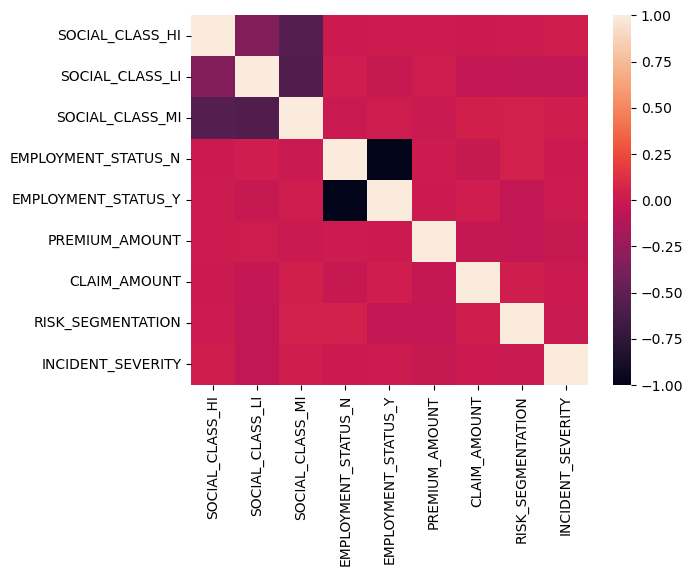

In [61]:
general_fraud_data_auto_numeric_corr = general_fraud_data_auto_numeric.corr()
sns.heatmap(general_fraud_data_auto_numeric_corr)

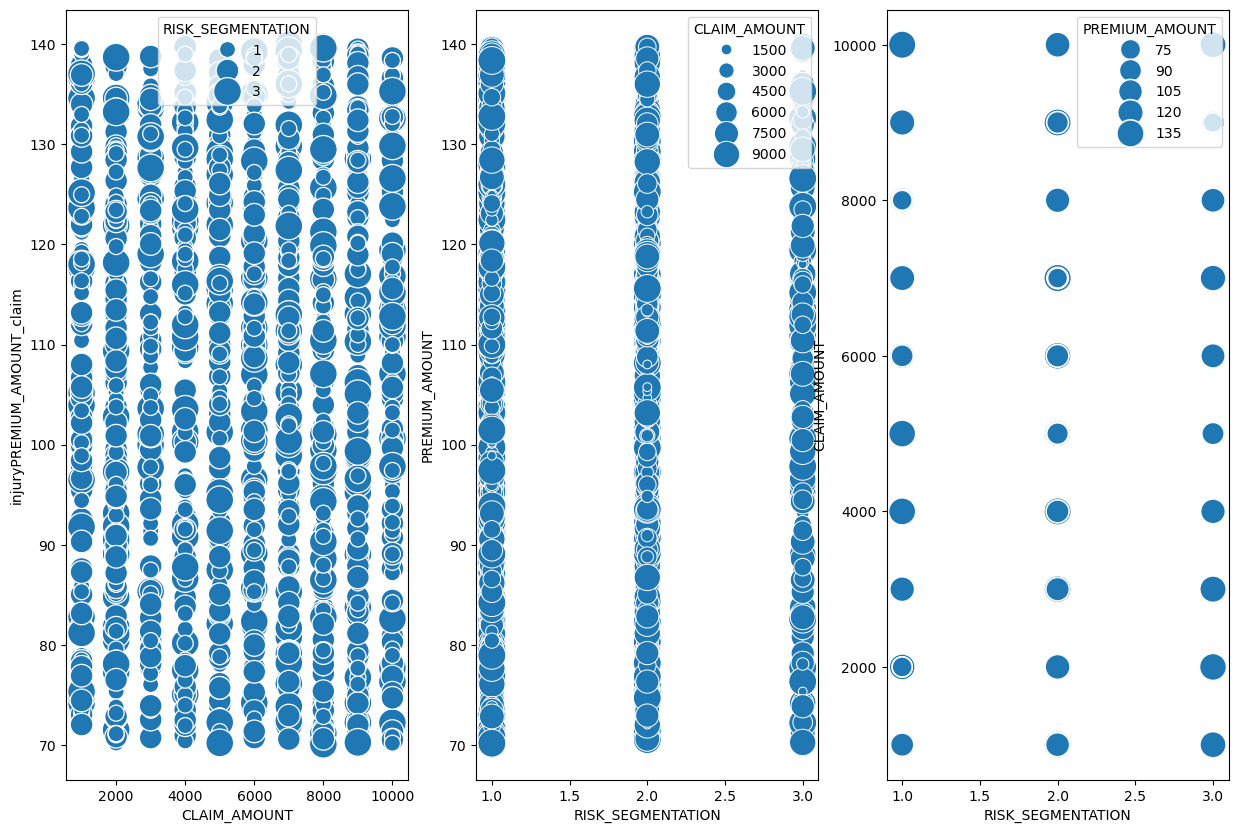

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.subplot(1,3,1)

df_only_data_wanted = general_fraud_data_auto_numeric[["CLAIM_AMOUNT", "PREMIUM_AMOUNT", "RISK_SEGMENTATION"]]

claim_series_ = df_only_data_wanted["CLAIM_AMOUNT"]
premium_series = df_only_data_wanted["PREMIUM_AMOUNT"]
risk_series = df_only_data_wanted["RISK_SEGMENTATION"]

claim_min = claim_series_.min()
claim_max = claim_series_.max()

premium_min =premium_series.min()
premium_max = premium_series.max()

risk_min = risk_series.min()
risk_max = risk_series.max()

maxbubble = 400
ax = sns.scatterplot(data = df_only_data_wanted, x = "CLAIM_AMOUNT", y = "PREMIUM_AMOUNT", size = "RISK_SEGMENTATION", sizes = (risk_min / risk_max * maxbubble, maxbubble))
ax.set_xlabel("CLAIM_AMOUNT")
ax.set_ylabel("injuryPREMIUM_AMOUNT_claim")

plt.subplot(1,3,2)
maxbubble = 400
ax = sns.scatterplot(data = df_only_data_wanted, x = "RISK_SEGMENTATION", y = "PREMIUM_AMOUNT", size = "CLAIM_AMOUNT", sizes = (claim_min / claim_max * maxbubble, maxbubble))
ax.set_xlabel("RISK_SEGMENTATION")
ax.set_ylabel("PREMIUM_AMOUNT")



plt.subplot(1,3,3)
maxbubble = 400
ax = sns.scatterplot(data = df_only_data_wanted, x = "RISK_SEGMENTATION", y = "CLAIM_AMOUNT", size = "PREMIUM_AMOUNT", sizes = (premium_min / premium_max * maxbubble, maxbubble))
ax.set_xlabel("RISK_SEGMENTATION")
ax.set_ylabel("CLAIM_AMOUNT")

None


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
general_fraud_data_auto_numeric_scaled = scaler.fit_transform(general_fraud_data_auto_numeric)

In [64]:
pca_3 = decomposition.PCA(n_components = 3)
pca_3 = pca_3.fit(scaled_car_claims)
car_claims_pca3 = pca_3.transform(scaled_car_claims)
explained_variance_3 = pca_3.explained_variance_ratio_
print(explained_variance_3)

[0.0751983  0.06769617 0.05442946]


In [65]:
def trueFlaseToInt(x):
    if x:
        x = 1
    else:
        x = 0
    return x

Log Regression Accuracy trying to predict Risk_Segmentation based on claim and premium amounts: 0.4485387547649301


<Axes: title={'center': 'Confusion Matrix'}>

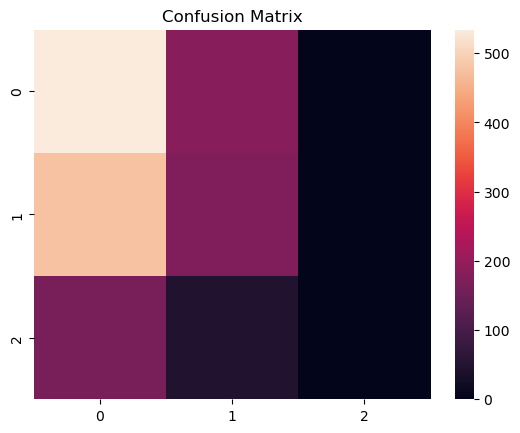

In [66]:
from sklearn.linear_model import LogisticRegression
Y_log_regression = general_fraud_data_auto_numeric["RISK_SEGMENTATION"]
X_log_regression = general_fraud_data_auto_numeric[["CLAIM_AMOUNT", "PREMIUM_AMOUNT"]]


log_regressor = LogisticRegression(max_iter=300)

log_regressor.fit(X_log_regression,Y_log_regression)
y_log_preds = log_regressor.predict(X_log_regression)
accuracy_log_regression = accuracy_score(Y_log_regression, y_log_preds)

print(f"Log Regression Accuracy trying to predict Risk_Segmentation based on claim and premium amounts: {accuracy_log_regression}")
cm = confusion_matrix(Y_log_regression,y_log_preds)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
sns.heatmap(cm)

In [70]:
general_fraud_data_auto_numeric_scaled = scaler.fit_transform(general_fraud_data_auto_numeric)
pca_3 = decomposition.PCA(n_components = 3)
three_ = pca_3.fit(general_fraud_data_auto_numeric_scaled)
general_fraud_data_auto_numeric_pca3 = three_.fit_transform(general_fraud_data_auto_numeric_scaled)
explained_variance_general_fraud_data_auto_numeric_3 = three_.explained_variance_ratio_
print(explained_variance_general_fraud_data_auto_numeric_3)

[0.22289777 0.18486186 0.15106263]


Log Regression Accuracy trying to predict Incident severity based on Risk Segmentation: 0.34498094027954257


<Axes: title={'center': 'Confusion Matrix'}>

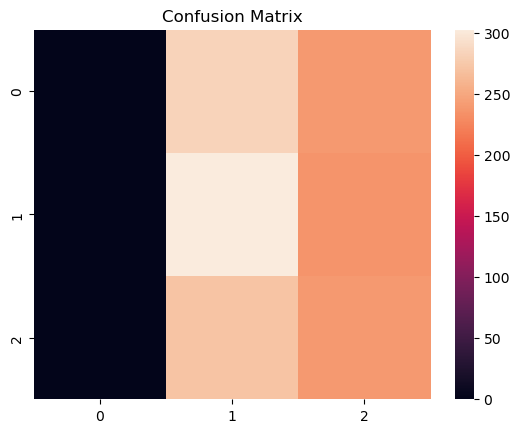

In [ ]:
from sklearn.linear_model import LogisticRegression
Y_log_regression = general_fraud_data_auto_numeric["INCIDENT_SEVERITY"]
X_log_regression = general_fraud_data_auto_numeric[["RISK_SEGMENTATION" ]]


log_regressor = LogisticRegression()

log_regressor.fit(X_log_regression,Y_log_regression)
y_log_preds = log_regressor.predict(X_log_regression)
accuracy_log_regression = accuracy_score(Y_log_regression, y_log_preds)

print(f"Log Regression Accuracy trying to predict Incident severity based on Risk Segmentation: {accuracy_log_regression}")
cm = confusion_matrix(Y_log_regression,y_log_preds)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
sns.heatmap(cm)

In [ ]:
#lets try and predict the claim amount using the first three PCA and then compare without it

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
X_pca = general_fraud_data_auto_numeric.drop(columns=["CLAIM_AMOUNT"],inplace=False)
y_pca = general_fraud_data_auto_numeric["CLAIM_AMOUNT"]
pipeline = Pipeline([('pca', decomposition.PCA(n_components=1)), ('lr', LinearRegression())])
pipeline.fit(X_pca,y_pca)
y_preds_rf_pca = pipeline.predict(X_pca)
MSE = mean_squared_error(y_pca,y_preds_rf_pca)
print(f"MSE with 1 PCA {accuracy}")

MSE with 1 PCA 0.9632295719844358


In [ ]:
X_pca = general_fraud_data_auto_numeric.drop(columns=["CLAIM_AMOUNT"],inplace=False)
y_pca = general_fraud_data_auto_numeric["CLAIM_AMOUNT"]
pipeline = Pipeline([('pca', decomposition.PCA(n_components=2)), ('lr', LinearRegression())])
pipeline.fit(X_pca,y_pca)
y_preds_rf_pca = pipeline.predict(X_pca)
MSE = mean_squared_error(y_pca,y_preds_rf_pca)
print(f"MSE with 2 PCA {MSE}")

MSE with 2 PCA 8336855.444643358


In [ ]:
X_pca = general_fraud_data_auto_numeric.drop(columns=["CLAIM_AMOUNT"],inplace=False)
y_pca = general_fraud_data_auto_numeric["CLAIM_AMOUNT"]
pipeline = Pipeline([('pca', decomposition.PCA(n_components=3)), ('lr', LinearRegression())])
pipeline.fit(X_pca,y_pca)
y_preds_rf_pca = pipeline.predict(X_pca)
MSE = mean_squared_error(y_pca,y_preds_rf_pca)
print(f"MSE with 3 PCA {MSE}")

MSE with 3 PCA 8329206.91139979


In [ ]:
X = general_fraud_data_auto_numeric.drop(columns=["CLAIM_AMOUNT"],inplace=False)
y = general_fraud_data_auto_numeric["CLAIM_AMOUNT"]
regression_model = LinearRegression()
regression_model.fit(X,y)
y_preds_lr = pipeline.predict(X)
MSE = mean_squared_error(y,y_preds_lr)
print(f"MSE with 3 PCA {MSE}")

MSE with 3 PCA 8329206.91139979



**CONCLUSIONS**

After running through some basic modeling with this data it is clear that the model can be done accuratley by using the first or second principal component transformations as when using them to predict the claim amount field the MSE is quite comparable and the difference is negligble.  In addition there had been some interesting outcomes when using fields to predict the class of other fields, confirming what the correlation matrix had showed, which is a lower amount of correlation means less accuracy when using classification models.  Overall this data does not have many higihly correlated columns and conclusions made from the data might not be that useful or accurate, but there will need to be more testing to prove this such as tuning hyperparameters and a more thorough model selection process.

______________________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
insurance_claims_numeric = pd.read_csv("./insurance_claims_numericFE.csv")

In [ ]:
insurance_claims_numeric

,age,total_claim_amount,bodily_injuries,injury_claim,policy_deductable,auto_year,capital-gains,capital-loss,collision_type,fraud_reported
0,48,71610,1,6510,1000,2004,53300,0,1,1
1,29,34650,2,7700,2000,2007,35100,0,3,0
2,39,64100,0,6410,1000,2003,0,0,3,1
3,33,27700,1,2770,500,2012,0,0,2,0
4,42,42300,2,4700,500,1996,0,-39300,3,0
...,...,...,...,...,...,...,...,...,...,...
520,21,53280,1,5920,1000,2015,37500,-54000,3,0
521,44,46980,0,0,1000,2002,59400,-32200,3,0
522,26,36700,1,3670,500,2010,50300,0,2,0
523,38,87200,0,17440,1000,2006,0,0,2,0


<Axes: >

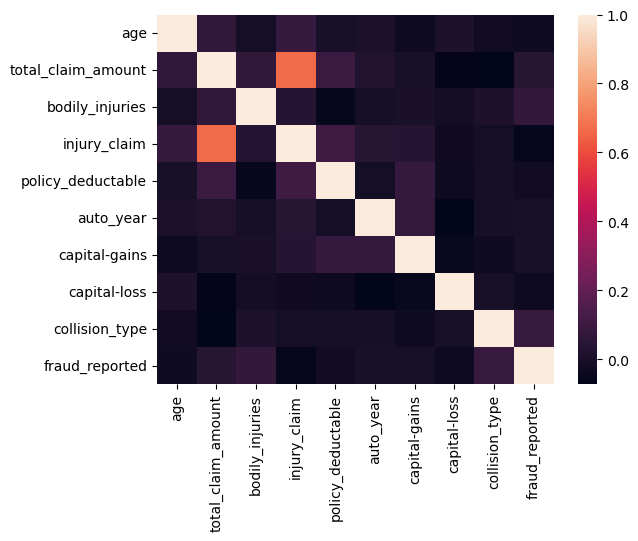

In [ ]:
insurance_claims_numeric_corr = insurance_claims_numeric.corr()
sns.heatmap(insurance_claims_numeric_corr)

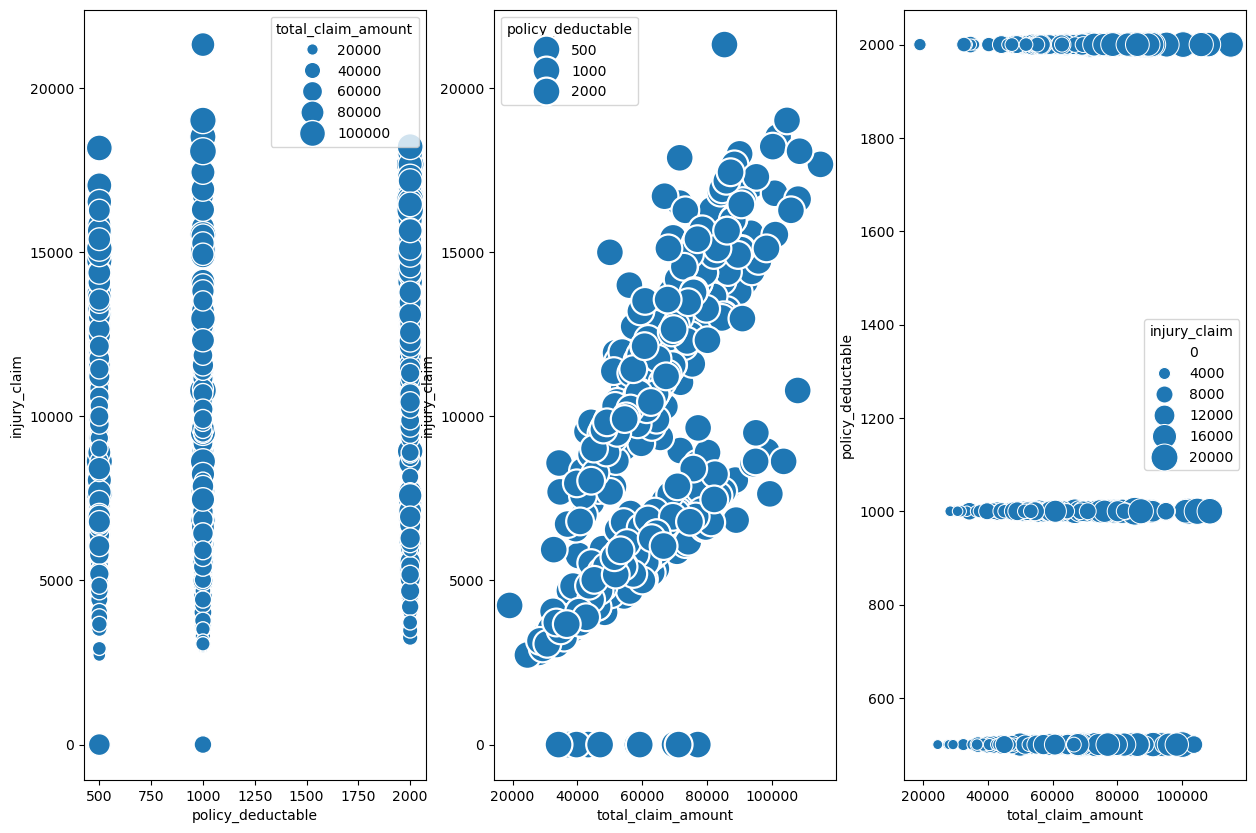

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.subplot(1,3,1)

df_only_data_wanted = insurance_claims_numeric[["policy_deductable", "injury_claim", "total_claim_amount"]]

policy_series = df_only_data_wanted["policy_deductable"]
injury_series = df_only_data_wanted["injury_claim"]
claim_series = df_only_data_wanted["total_claim_amount"]

policy_min = policy_series.min()
policy_min = policy_series.max()

claim_min =claim_series.min()
claim_max = claim_series.max()

injury_min = injury_series.min()
injury_max = injury_series.max()

maxbubble = 400
ax = sns.scatterplot(data = df_only_data_wanted, x = "policy_deductable", y = "injury_claim", size = "total_claim_amount", sizes = (claim_min / claim_max * maxbubble, maxbubble))
ax.set_xlabel("policy_deductable")
ax.set_ylabel("injury_claim")

plt.subplot(1,3,2)
maxbubble = 400
ax = sns.scatterplot(data = df_only_data_wanted, x = "total_claim_amount", y = "injury_claim", size = "policy_deductable", sizes = (policy_min / policy_min * maxbubble, maxbubble))
ax.set_xlabel("total_claim_amount")
ax.set_ylabel("injury_claim")



plt.subplot(1,3,3)
maxbubble = 400
ax = sns.scatterplot(data = df_only_data_wanted, x = "total_claim_amount", y = "policy_deductable", size = "injury_claim", sizes = (injury_min / injury_max * maxbubble, maxbubble))
ax.set_xlabel("total_claim_amount")
ax.set_ylabel("policy_deductable")

None


In [ ]:
insurance_claims_numeric_scaled = scaler.fit_transform(insurance_claims_numeric)
pca_3 = decomposition.PCA(n_components = 3)
pca_3 = pca_3.fit(insurance_claims_numeric_scaled)
explained_variance_3 = pca_3.explained_variance_ratio_
print(explained_variance_3)

[0.17334703 0.1152669  0.11451915]


In [ ]:
X = insurance_claims_numeric.drop(columns="fraud_reported", inplace =False)
y = insurance_claims_numeric["fraud_reported"]
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X,y)
preds = rf_model.predict(X)
print(f"Accuraccy of RF {accuracy_score(y,preds)}")

Accuraccy of RF 1.0


In [ ]:
#trying to predict the total claim amount based on the collision type
X = pd.DataFrame(insurance_claims_numeric["collision_type"])
y = pd.DataFrame(insurance_claims_numeric["total_claim_amount"])

lr = LinearRegression()
lr.fit(X,y)
preds = lr.predict(X)

print(f"MSE Using collision type to predict total claim amount: {mean_squared_error(y,preds)}")

MSE Using collision type to predict total claim amount: 257730116.95473233


In [ ]:
#Predict total claim amount using collision type
X = pd.DataFrame(insurance_claims_numeric["collision_type"])
y = pd.DataFrame(insurance_claims_numeric["injury_claim"])

lr = LinearRegression()
lr.fit(X,y)
preds = lr.predict(X)

print(f"MSE Using injury claim to predict total claim amount: {mean_squared_error(y,preds)}")

MSE Using injury claim to predict total claim amount: 17255561.252080783


In [ ]:
#using PCA to predict the collision type
X_pca = insurance_claims_numeric.drop(columns=["collision_type"],inplace=False)
y_pca = insurance_claims_numeric["collision_type"]


In [ ]:
pipeline = Pipeline([('pca', decomposition.PCA(n_components=1)), ('lr', LinearRegression())])
pipeline.fit(X_pca,y_pca)
y_preds_rf_pca = pipeline.predict(X_pca)
mse_ = mean_squared_error(y_pca,y_preds_rf_pca)
print(f"MSE with 1 PCA {mse_}")

MSE with 1 PCA 0.6989248134294253


In [ ]:
pipeline = Pipeline([('pca', decomposition.PCA(n_components=2)), ('lr', LinearRegression())])
pipeline.fit(X_pca,y_pca)
y_preds_rf_pca = pipeline.predict(X_pca)
mse_ = mean_squared_error(y_pca,y_preds_rf_pca)
print(f"MSE with 2 PCA {mse_}")

MSE with 2 PCA 0.6984294781385179


In [ ]:
pipeline = Pipeline([('pca', decomposition.PCA(n_components=3)), ('lr', LinearRegression())])
pipeline.fit(X_pca,y_pca)
y_preds_rf_pca = pipeline.predict(X_pca)
mse_ = mean_squared_error(y_pca,y_preds_rf_pca)
print(f"MSE with 3 PCA {mse_}")

MSE with 3 PCA 0.6948538449229348


In [ ]:
rm = LinearRegression()
rm.fit(X_pca,y_pca)
preds = rm.predict(X_pca)
print(f"MSE with all components {mean_squared_error(preds,y_pca)}")

MSE with all components 0.6861870667895933


**CONCLUSIONS**
This data does not have high correlations in either direction.  With the main two being the total claim amount and the injury claim amount.  This might make predicting the fraud reported with a high accuracy difficult.  In addition the accuracy being 1.0 when trying to predict it using a random forrest means that the model that had been made to predict it likely had been overfitting on the training data.  In order to draw more conclusions the model will have to be cross validated more using methods such as hold out testing.  Lastly, using PCA transformations to run the models does look effective and like we can use them to predict if there is fraud or not.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

C:\Users\Joe\AppData\Local\Temp\ipykernel_27188\788937333.py:19: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(f'{height}',


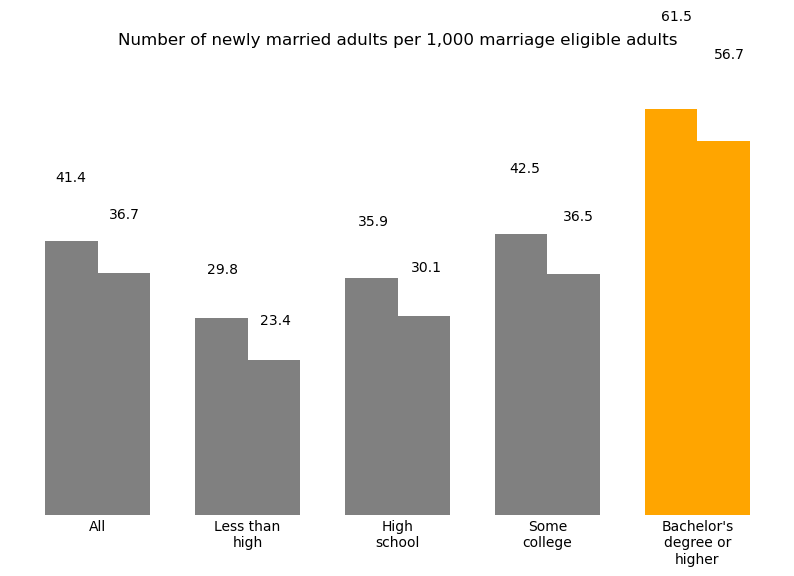

In [ ]:

categories = ['All', 'Less than\nhigh', 'High\nschool', 'Some\ncollege', "Bachelor's\ndegree or\nhigher"]

values_2008 = [41.4, 29.8, 35.9, 42.5, 61.5]

values_2012 = [36.7, 23.4, 30.1, 36.5, 56.7]

x = np.arange(len(categories))
width = 0.35  
fig, ax = plt.subplots(figsize=(10, 6))


bars1 = ax.bar(x - width/2, values_2008, width, color=['gray']*4 + ['orange'], label='2008')
bars2 = ax.bar(x + width/2, values_2012, width, color=['gray']*4 + ['orange'], label='2012')


for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.tick_params(axis='x', which='both', length=0)  
ax.tick_params(axis='y', which='both', length=0)
ax.set_ylim(0, 70)  

for spine in ax.spines.values():
    spine.set_visible(False)

plt.title("Number of newly married adults per 1,000 marriage eligible adults")
ax.set_yticks([])

plt.show()
None